Script di classificazione

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
import itertools
warnings.filterwarnings("ignore");

In [2]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Machine Learning')
#os.chdir('/content/drive/My Drive/Inserire PATH')

Mounted at /content/drive


Caricamento del dataset di addestramento

In [3]:
import pandas as pd

myds_pandas=pd.read_csv('ClassificationData_SDA_IZ_group2.csv')
myds_pandas=pd.read_csv('Inserire FILENAME.csv')

In [4]:
Z=myds_pandas['Z_OppositeTeamDefence']
Y=myds_pandas[["Y_Dehydration", "Y_Hyperthermia","Y_AvgSpeed", "Y_AvgTravelledDistance" , "Y_PressingCapability", "Y_PhysicalEndurance", "Y_MentalConcentration", "Y_EmotionalMotivation"]]


In [5]:
YY_train, YY_test, ZZ_train, ZZ_test= train_test_split(Y,Z, test_size=0.8)

Implementazione e visualizzazione risultati di un classificatore Naive Bayes


Classifier Performance Metrics
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        45
           1       0.94      0.99      0.97       115

    accuracy                           0.95       160
   macro avg       0.96      0.92      0.94       160
weighted avg       0.95      0.95      0.95       160



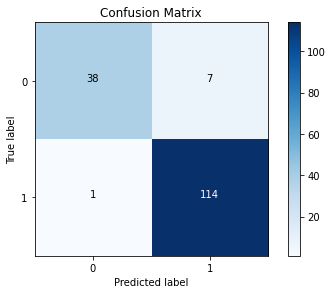

In [8]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
ZZ_estimated=gnb.fit(YY_train, ZZ_train).predict(YY_test)

conf = confusion_matrix(ZZ_test, ZZ_estimated)

classes = [0, 1]
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('\nClassifier Performance Metrics')
print(classification_report(ZZ_test, ZZ_estimated))


Implementazione e visualizzazione risultati di un classificatore con Regressione Logistica




Classifier Performance Metrics
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        45
           1       0.97      0.99      0.98       115

    accuracy                           0.97       160
   macro avg       0.97      0.95      0.96       160
weighted avg       0.97      0.97      0.97       160



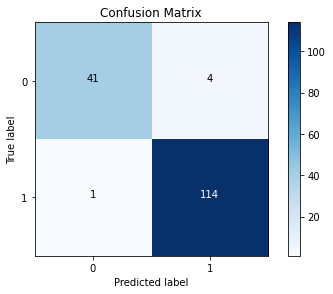

In [29]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
lr = SGDClassifier('log')
lr.fit(YY_train, ZZ_train)
ZZ_estimated = lr.predict(YY_test)


conf = confusion_matrix(ZZ_test, ZZ_estimated)

classes = [0, 1]
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('\nClassifier Performance Metrics')
print(classification_report(ZZ_test, ZZ_estimated))


Visualizzazione predittori dei campioni per cui il classificatore logistico cade in errore

In [13]:
ZZ_test = np.array(ZZ_test)
err=np.argwhere(ZZ_test!=ZZ_estimated).reshape((-1,))
YY_test_np=np.array(YY_test)
for i in range (err.size):
    print(YY_test_np[i])

[ 1.43540688  2.50414428  6.58649188  0.78069942 12.89194102  7.74540464
 13.0100324  10.91302662]
[ 1.83445253  4.49266997  3.54858306 -3.06180982  9.99392417  4.21252174
  9.79401046  9.19426206]
[ 3.25961497  3.7605274   2.88028342 -3.11245417 10.01081865  1.51757451
 13.31428657 10.53627859]
[ 6.09914222  7.86059065  2.77084622 -3.66974163 11.24068253  1.03655175
 13.14114859 11.35299643]
[ 7.0758703  11.49018887 -3.80257847 -7.24131584  7.17874768 -3.64229148
 10.43778744 10.27967401]
[ 5.38291702  9.01353245  3.12972208 -3.39905632 14.32467648  3.31329077
 17.78067398 13.91716925]
[ 4.03255131  7.16473996  6.41236422 -0.45440062 15.25202322  5.22461048
 15.16282932 13.33985129]
[ 6.19860243  8.9994809  -3.64879785 -8.42476943  4.63786324 -5.94265472
  5.6878559   7.93931797]


Implementazione e visualizzazione risultati di un classificatore con Regressione Logistica in seguito ad una trasformazione PCA


Classifier Performance Metrics
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        45
           1       0.93      1.00      0.97       115

    accuracy                           0.95       160
   macro avg       0.97      0.91      0.93       160
weighted avg       0.95      0.95      0.95       160



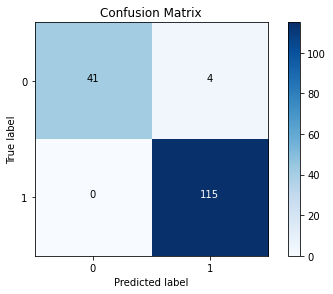

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

pipe = []
accuracy = []
confMatrix = []

for i in range (8):
    pipe.append(Pipeline([('pca', PCA(n_components= i+1)),('Logistic Regression', SGDClassifier('log'))]))
    pipe[i].fit(YY_train, ZZ_train)
    ZZ_estimated= pipe[i].predict(YY_test)
    confMatrix.append(confusion_matrix(ZZ_test, ZZ_estimated))
    metrics = classification_report(ZZ_test, ZZ_estimated, output_dict=True)
    accuracy.append(metrics['accuracy'])

max_value = max(accuracy)
conf = confMatrix[accuracy.index(max_value)]

classes = [0, 1]
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('\nClassifier Performance Metrics')
print(classification_report(ZZ_test, ZZ_estimated))
